### Traffic Accident Prediction

##### Understanding the Problem 

To predict Traffic accident using ML algorithm based on factors like Weather, Speed_Limit, Driver_Alcohol, Road_Condition, Vehicle_Type, Driver_Experience, Road_Light_Conditionetc.

### The objective of this project is to:

1. Develop a machine learning model to predict whether an accident will occur in the given input features.
2. predict the severity of the accident if it occurs.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### Load the dataset and find the basic information about the dataset

In [2]:
#import the data from dataset
df = pd.read_csv('dataset_traffic_accident.csv')


In [3]:
# Shows only 5 records
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [4]:
#  To provides a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [5]:
# to find the rows and columns in the dataset
print(f"The dataset contains {df.shape[0]} records and {df.shape[1]} features.")


The dataset contains 840 records and 14 features.


In [6]:
# To provides a statistical summary of a DataFrame's numerical columns by default. 
#It can also summarize categorical columns when specified.
# ie summarize the central tendency, dispersion and shape of a dataset's distribution, excluding ``NaN`` values.
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [7]:
# To show the count of duplicated record in the dataset
df.duplicated().sum()

14

In [8]:
#Shows the count of null values in the dataset
df.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [9]:
# Shows recordsin which any null values in the dataset
df[df.isnull().any(axis=1)]


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
5,Clear,Rural Road,Night,0.0,120.0,3.0,0.0,Moderate,NaN,Truck,49.0,43.0,Artificial Light,0.0
10,Foggy,NaN,Evening,NaN,60.0,2.0,0.0,Moderate,Dry,Car,33.0,28.0,Artificial Light,NaN
12,NaN,Rural Road,Afternoon,0.0,60.0,4.0,0.0,NaN,Dry,Car,25.0,16.0,Artificial Light,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,Snowy,Highway,Morning,0.0,30.0,2.0,1.0,Moderate,Under Construction,NaN,NaN,39.0,Artificial Light,0.0
832,Snowy,City Road,Evening,1.0,50.0,3.0,0.0,NaN,Wet,Car,18.0,12.0,Artificial Light,0.0
833,Rainy,Rural Road,Afternoon,0.0,NaN,4.0,0.0,Moderate,Dry,Car,53.0,45.0,Daylight,0.0
834,Rainy,City Road,Evening,0.0,60.0,NaN,1.0,Low,Under Construction,Car,33.0,27.0,Artificial Light,NaN


In [10]:
# Shows columns' name of the dataset
df.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')

### Data can be two types
1. Categorical Data Types
2. Numerical Data Types

In [11]:
#shows categorical columns with it's unique values in the dataset
cat_col = df.select_dtypes(object).columns
for col in cat_col:
    print(f"The unique value of {col}:{df[col].unique()}")

The unique value of Weather:['Rainy' 'Clear' 'Foggy' 'Stormy' nan 'Snowy']
The unique value of Road_Type:['City Road' 'Rural Road' 'Highway' nan 'Mountain Road']
The unique value of Time_of_Day:['Morning' 'Night' 'Evening' 'Afternoon' nan]
The unique value of Accident_Severity:[nan 'Moderate' 'Low' 'High']
The unique value of Road_Condition:['Wet' 'Icy' 'Under Construction' 'Dry' nan]
The unique value of Vehicle_Type:['Car' 'Truck' 'Bus' 'Motorcycle' nan]
The unique value of Road_Light_Condition:['Artificial Light' 'Daylight' 'No Light' nan]


In [12]:
# Shows Numerical columns with it's unique values in the dataset
num_col = df.select_dtypes(include=float).columns
for col in num_col:
    print(f"The unique value in {col} feature : {df[col].unique()}")

The unique value in Traffic_Density feature : [ 1. nan  2.  0.]
The unique value in Speed_Limit feature : [100. 120.  60. 195.  30.  nan  50.  80. 200. 206. 178. 208. 213. 190.
 196. 188. 194. 189. 193. 185. 199. 192. 198. 212. 181.]
The unique value in Number_of_Vehicles feature : [ 5.  3.  4. 11.  2.  1. nan 12. 13. 14. 10.]
The unique value in Driver_Alcohol feature : [ 0.  1. nan]
The unique value in Driver_Age feature : [51. 49. 54. 34. 62. 27. 29. 38. 50. 33. 47. 25. 67. 61. 46. 48. 53. 35.
 59. 32. 69. 68. 28. 40. 30. 60. 66. nan 63. 65. 18. 55. 45. 22. 26. 58.
 23. 57. 43. 41. 64. 42. 56. 52. 44. 20. 24. 19. 37. 21. 39. 36. 31.]
The unique value in Driver_Experience feature : [48. 43. 52. 31. 55. 26. 22. 29. 28. 38. 16. 63. 57. nan 41. 32. 53. 23.
 24. 47. 64. 60. 25. 65. 13. 36. 37. 21. 54. 14. 19. 49. 39. 58. 66. 17.
 59. 42. 46. 18. 61. 30. 51. 56. 34. 10. 27. 50. 33. 20. 67. 69. 40. 62.
 44. 12. 45. 15. 35. 11.  9.]
The unique value in Accident feature : [ 0.  1. nan]


# Data Preprocessing 
###### Data preprocessing is a critical step in machine learning that involves preparing raw data for analysis.
It includes:
1. Handling Missing values
2. Handle Duplicates:
3. Handle Outlier
4. encode categorical variables
5. scale numerical features.


### Handling Missing values
1. Fill NA values with mean/median/mode for numerical columns.
2. Fill with constant values or the most frequent category for categorical data.
3. Drop rows or columns with too many missing values if necessary.

### Fill NA values with mean/median/mode for numerical columns.
1. When to Use the Mean
	
    1.  Suitable for Symmetrical/Normal Distributions:
    2.  If the numerical data is approximately normally distributed (bell curve), the mean is a good representative of the central tendency.
	3. No Significant Outliers:

Note: The mean is sensitive to outliers. If the data contains no significant outliers, the mean will provide a balanced estimate.

2. When to Use the Median
	
    1. Suitable for Skewed Distributions:
	2. If the data is skewed (e.g., income levels, traffic volume during peak hours), the median is a better choice as it is not affected by extreme values.
	3. Presence of Outliers:

Note: The median is robust to outliers and provides a better central estimate in such cases.

For symmetrical or normal distributions, certain plots are especially suitable for visualizing and analyzing the data. 
1. Histogram

Purpose: Visualizes the frequency distribution of data.

Why Suitable: It helps confirm the bell shape of a normal distribution.
    
2. Density Plot (KDE - Kernel Density Estimation)

Purpose: Estimates the probability density function of the variable.

Why Suitable: Highlights the smooth shape of a distribution.

3. Box Plot

Purpose: Summarizes the distribution by showing median, quartiles, and potential outliers.

Why Suitable: Highlights symmetry and detects outliers in a normal distribution.

4. Q-Q Plot (Quantile-Quantile Plot)

Purpose: Compares the data distribution to a theoretical normal distribution.

Why Suitable: A straight diagonal line indicates that the data is normally distributed.

5. Violin Plot

Purpose: Combines box plot and KDE to show the distribution and central tendency.

Why Suitable: Provides a visual representation of symmetry and spread.

6. Normality Test (Bonus)

Use a statistical test like the Shapiro-Wilk test or Kolmogorov-Smirnov test to check normality:

In [13]:
# fill categorical null values with it's mode
for col in cat_col:
    df[col]=df[col].fillna(df[col].mode()[0])

In [14]:
# Drop all record in accident column has null records
df = df.dropna(subset=['Accident'])

In [15]:
num_col_fill=df[num_col].drop(['Traffic_Density','Driver_Alcohol'],axis=1).columns
for col in num_col_fill:
    df[col] = df[col].fillna(df[col].median())

In [16]:
df['Traffic_Density'] = df['Traffic_Density'].fillna(df['Traffic_Density'].mode()[0])
df['Driver_Alcohol'] = df['Driver_Alcohol'].fillna(df['Driver_Alcohol'].mode()[0]) 

#### Visualizes the frequency distribution of data.


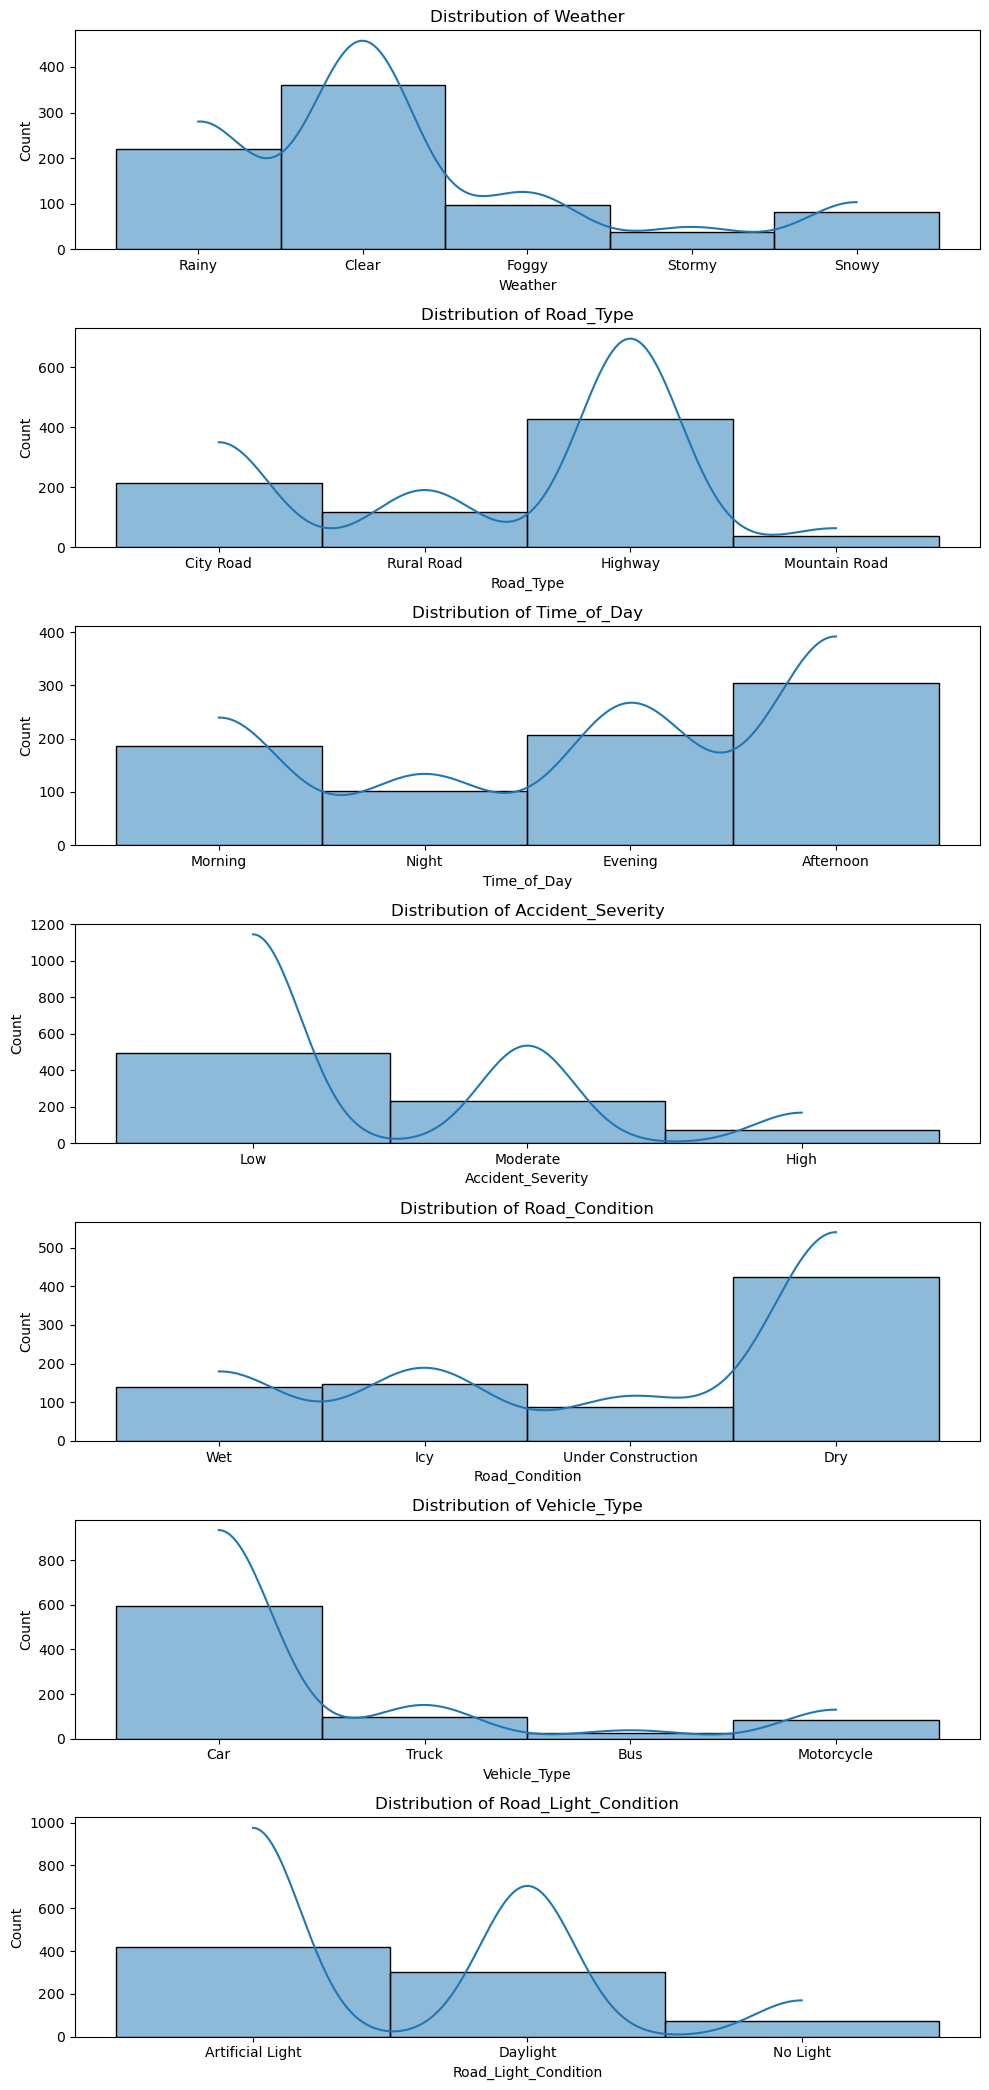

In [17]:
# Set figure size and loop through categorical columns
plt.figure(figsize=(10, len(cat_col) * 3))  # Dynamic height for each column
for i, col in enumerate(cat_col, start=1):
    plt.subplot(len(cat_col), 1, i)  # Create a new subplot for each column
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

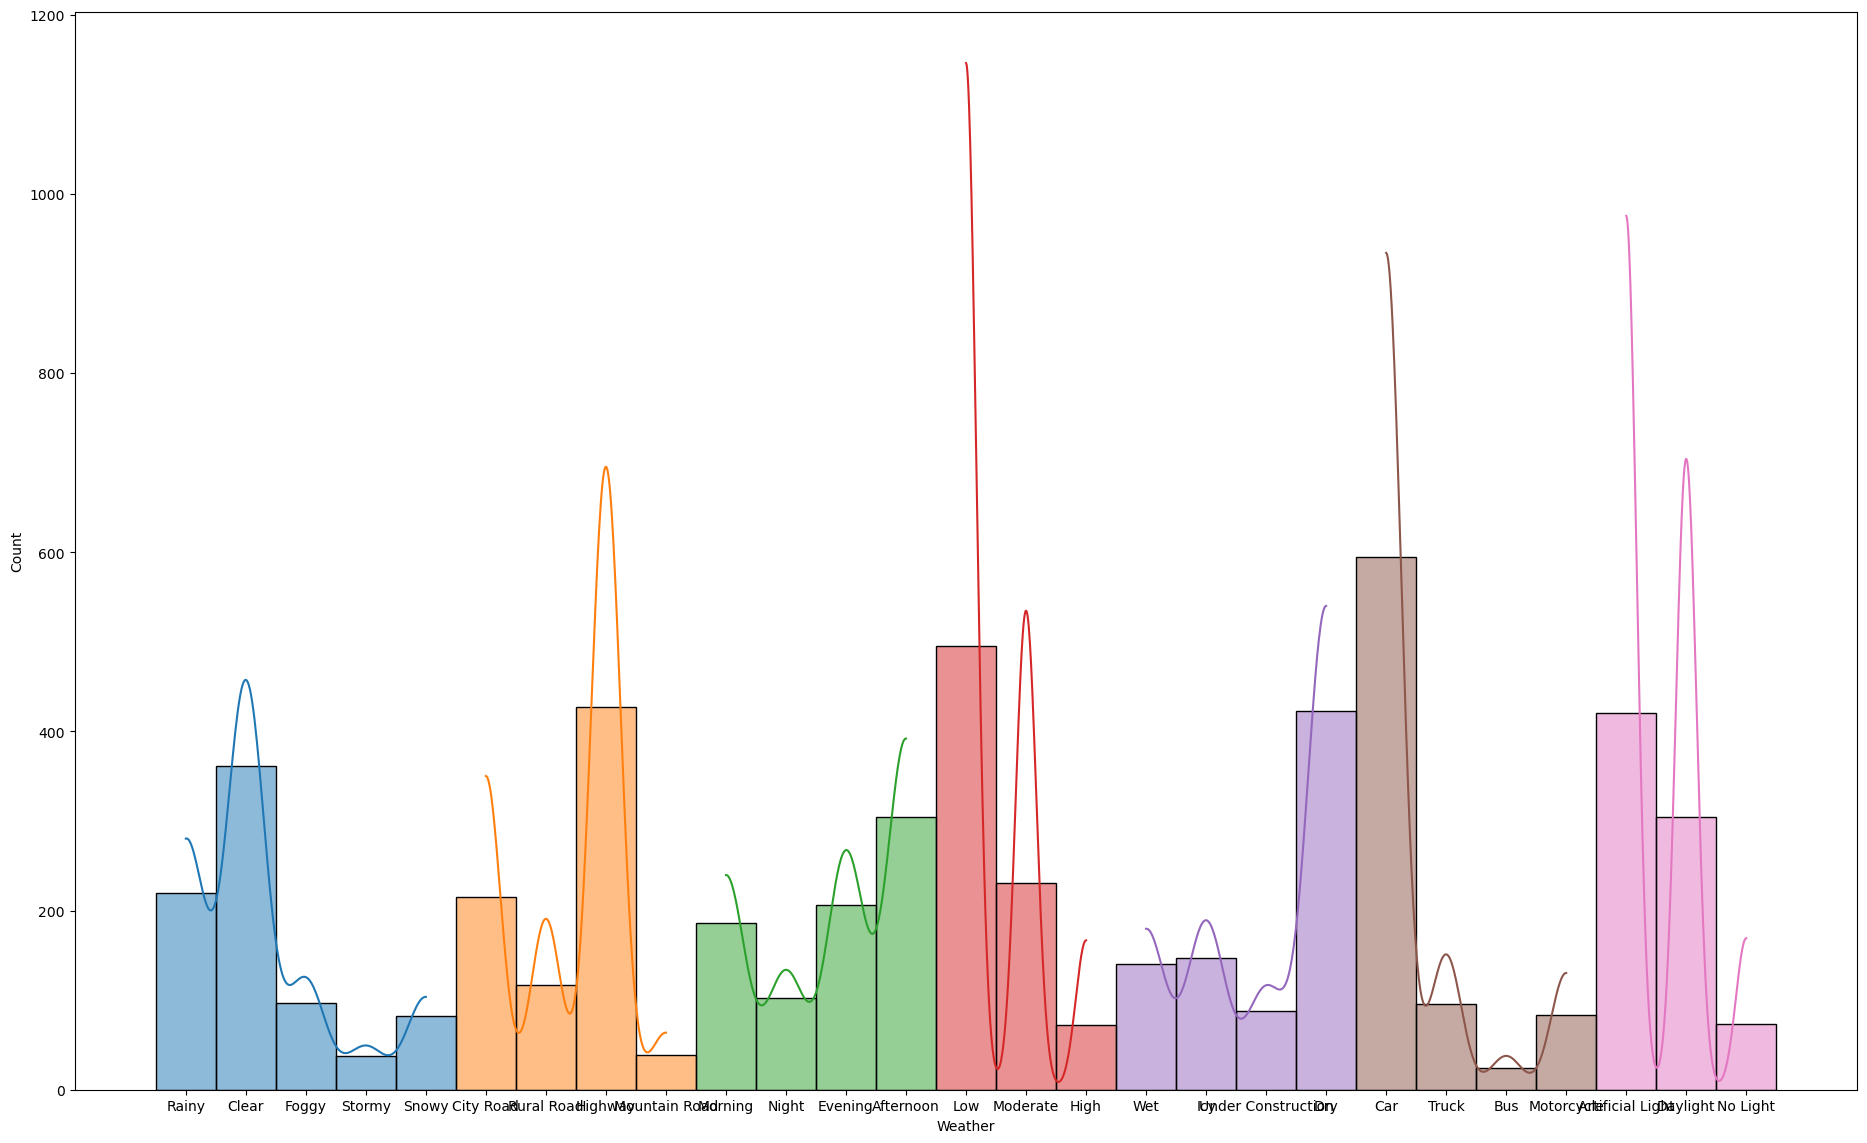

In [18]:
# Set figure size and heatmap grid size
plt.figure(figsize=(23, len(cat_col)*2))  # Set figure size (width, height)

for col in cat_col:
    sns.histplot(df[col],kde=True)    

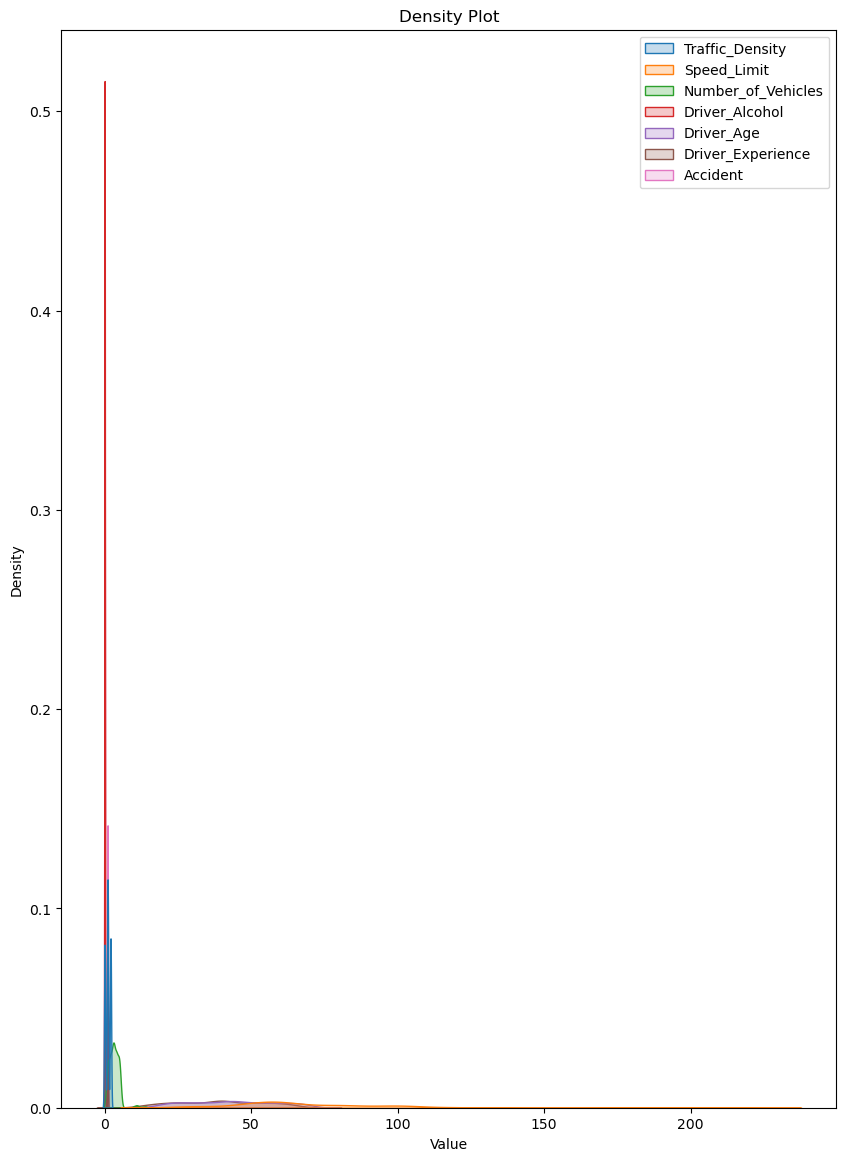

In [19]:
# Density Plot (KDE - Kernel Density Estimation) : Estimates the probability density function of the variable.
import seaborn as sns

# Density plot
plt.figure(figsize=(10, len(cat_col)*2))  # Set figure size (width, height)
sns.kdeplot(df, fill=True)
plt.title('Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


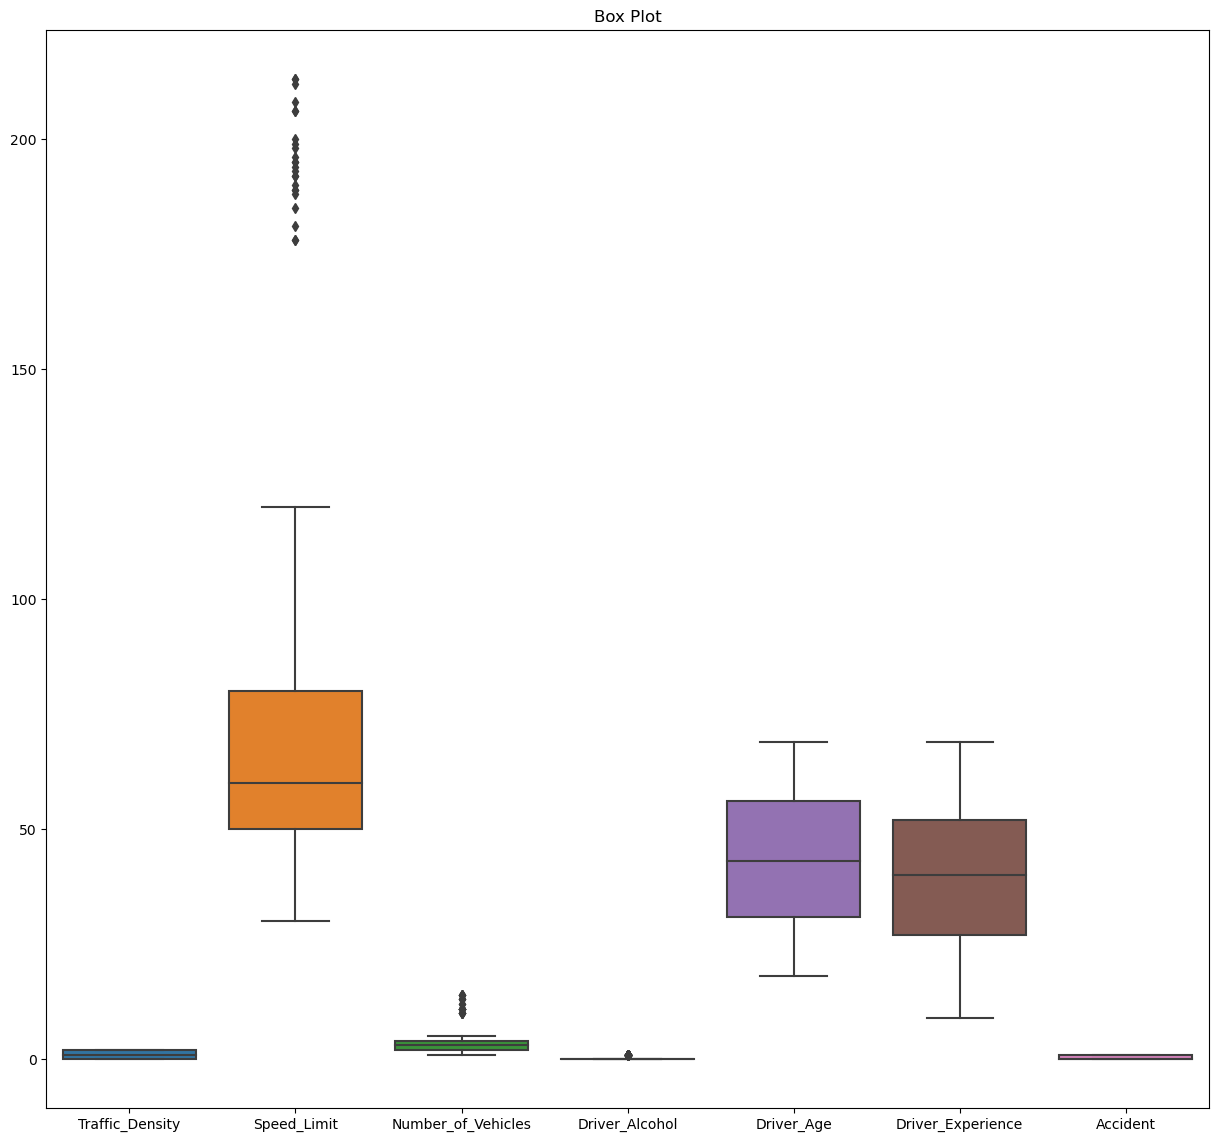

In [20]:
# BOX PLot : Summarizes the distribution by showing median, quartiles, and potential outliers.
plt.figure(figsize=(15, len(cat_col)*2))  # Set figure size (width, height)

# Box plot
sns.boxplot(df)
plt.title('Box Plot')
plt.show()


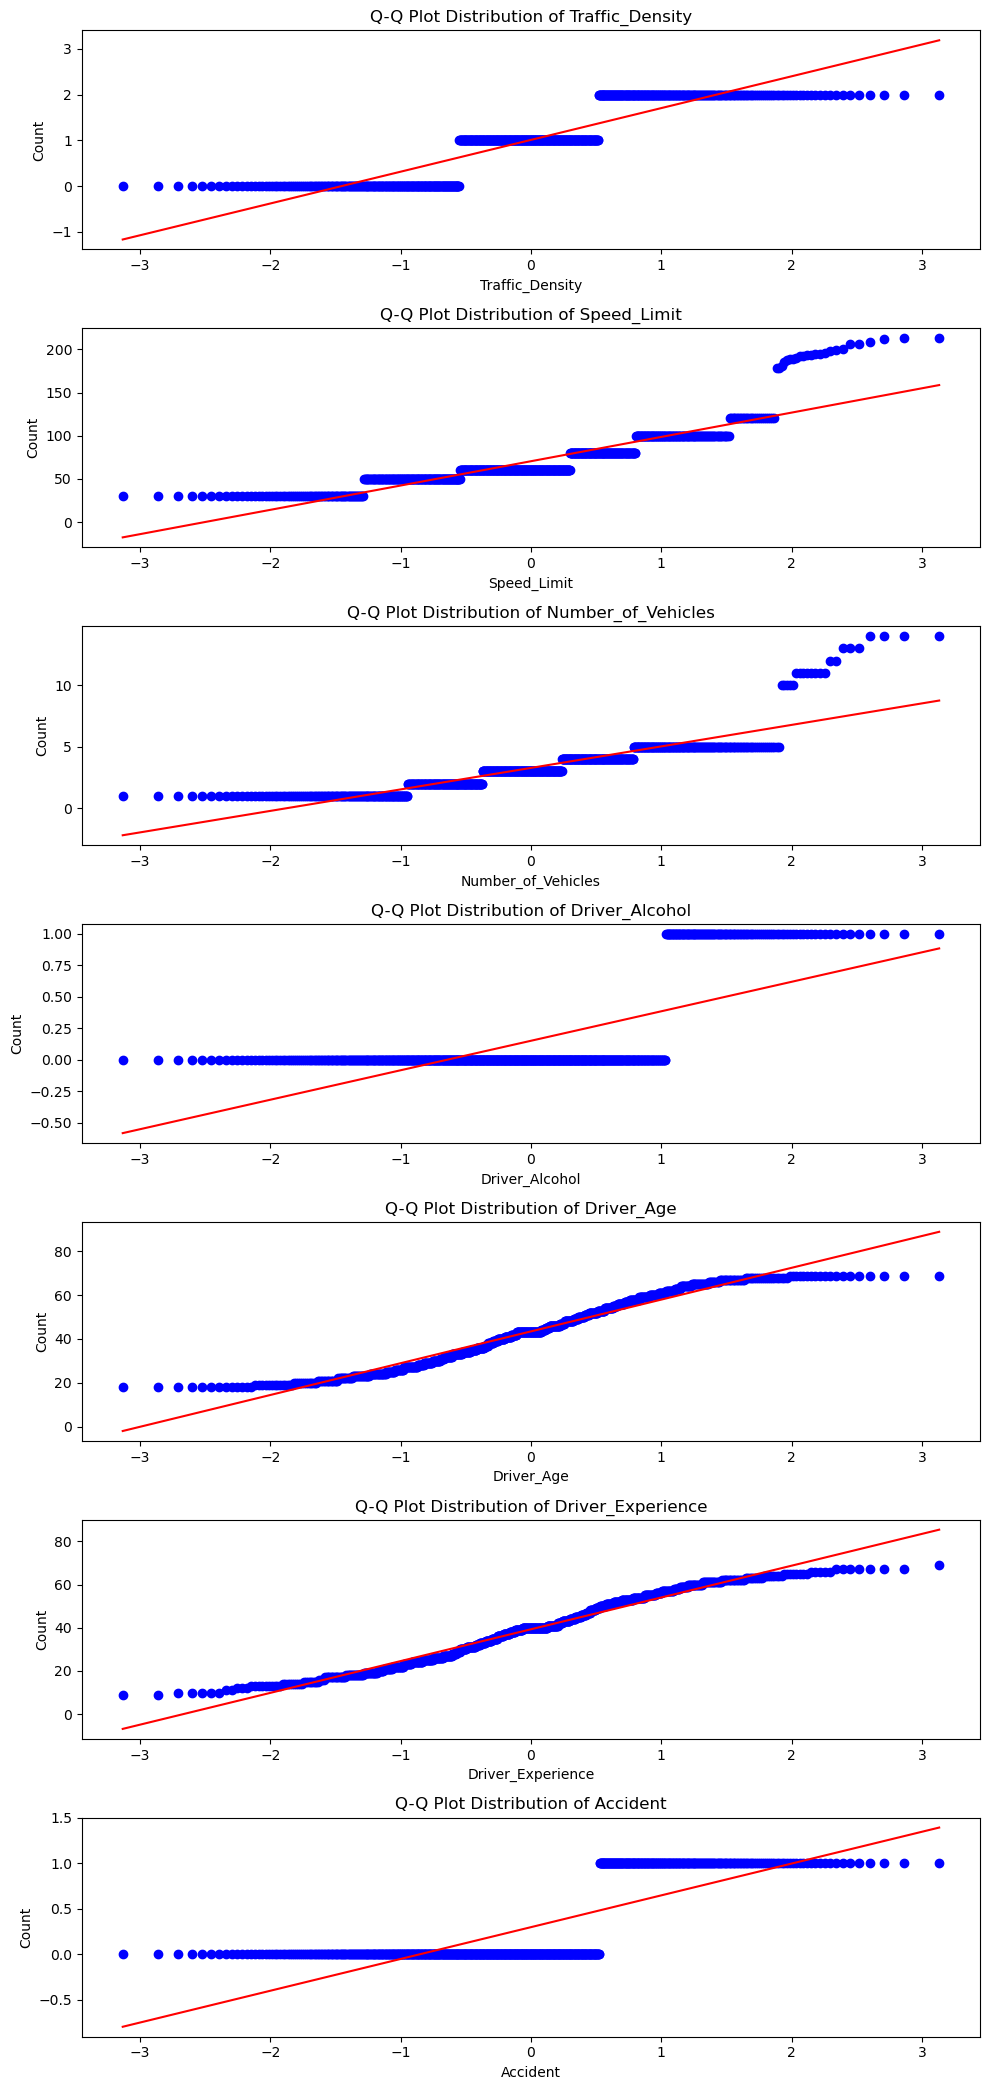

In [21]:
#Q-Q Plot (Quantile-Quantile Plot) : Compares the data distribution to a theoretical normal distribution.
import scipy.stats as stats

# Set figure size and loop through categorical columns
plt.figure(figsize=(10, len(cat_col) * 3))  # Dynamic height for each column
for i, col in enumerate(num_col, start=1):
    plt.subplot(len(num_col), 1, i)  # Create a new subplot for each column
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


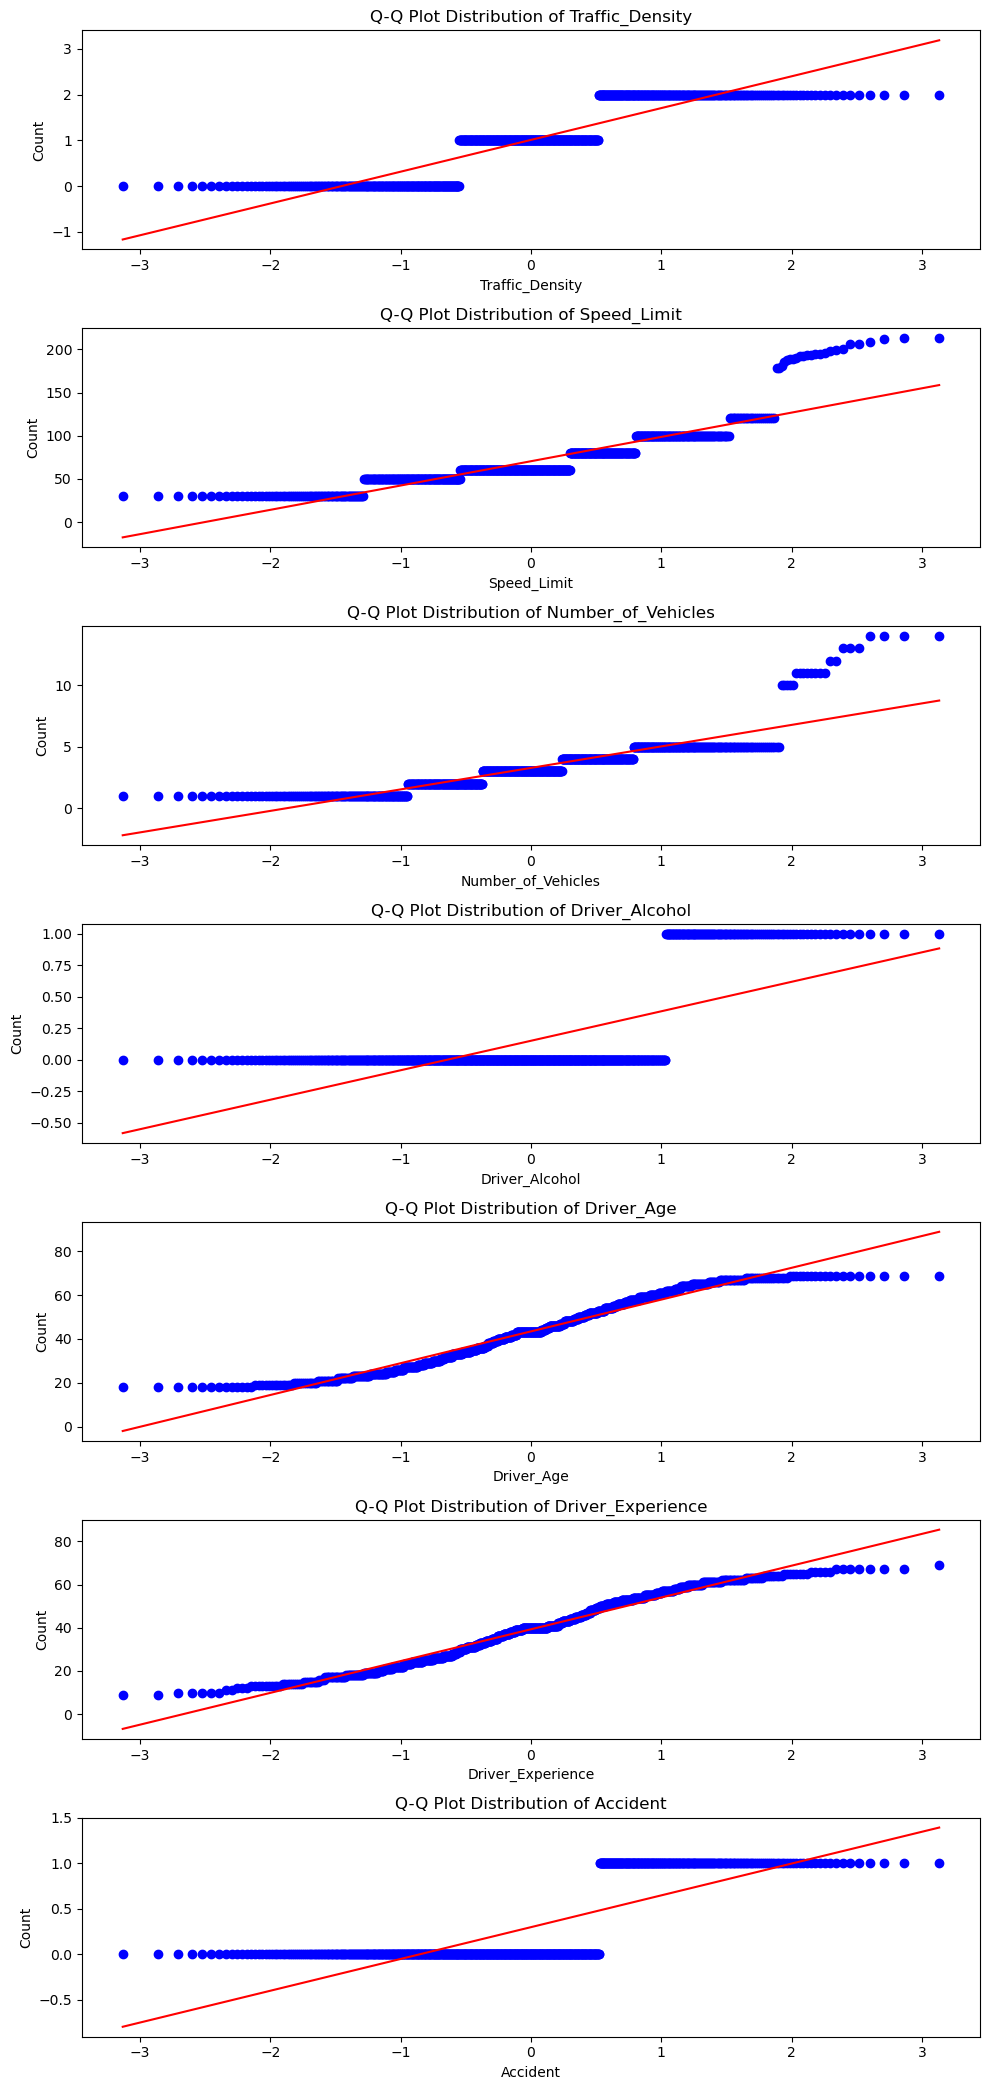

In [22]:
# Violin Plot : Provides a visual representation of symmetry and spread.
# Set figure size and loop through categorical columns
plt.figure(figsize=(10, len(cat_col) * 3))  # Dynamic height for each column
for i, col in enumerate(num_col, start=1):
    plt.subplot(len(num_col), 1, i)  # Create a new subplot for each column
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

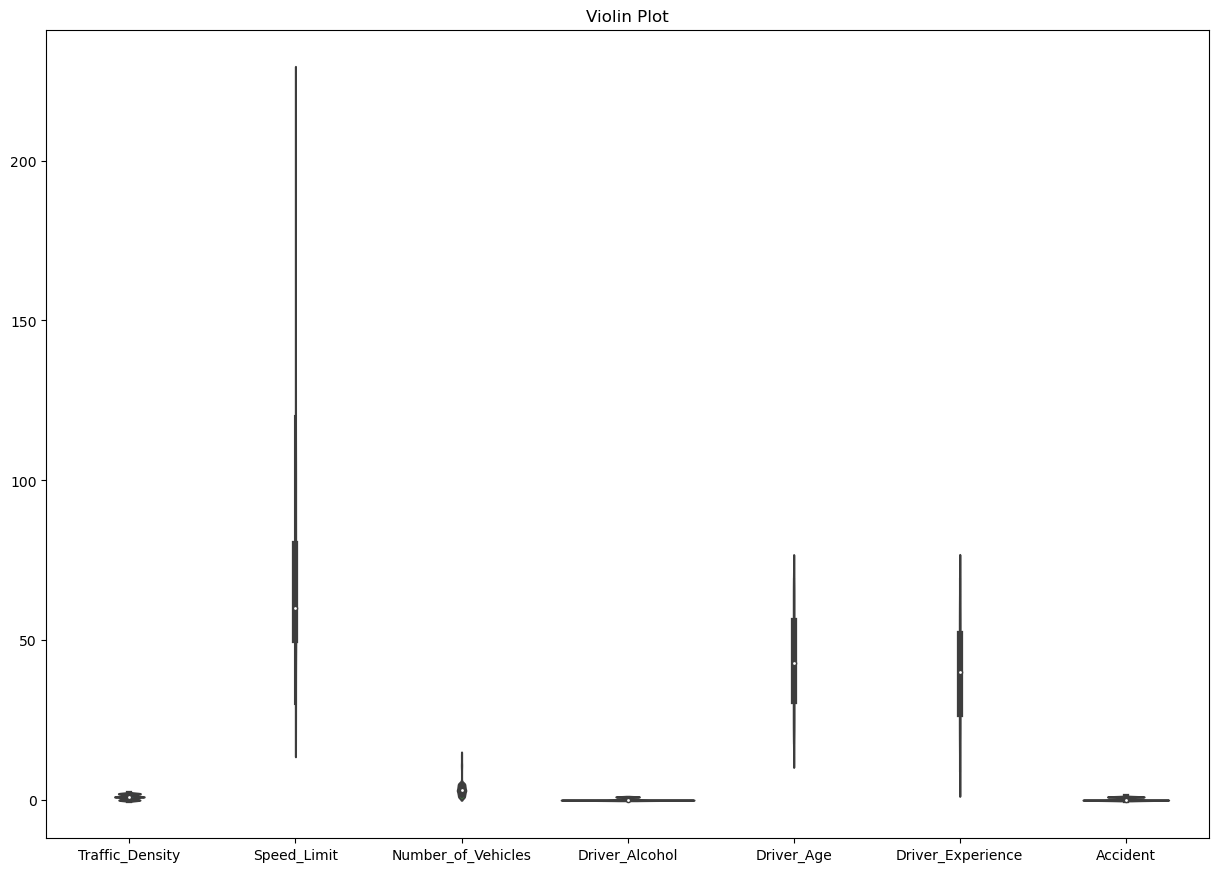

In [23]:
plt.figure(figsize=(15, len(cat_col) * 1.5))  # Dynamic height for each column
sns.violinplot(df)
plt.title('Violin Plot')
plt.show()

In [24]:
# df[num_col].hist(bins=30, figsize=(12,10), color='g')
# plt.tight_layout()
# plt.show()

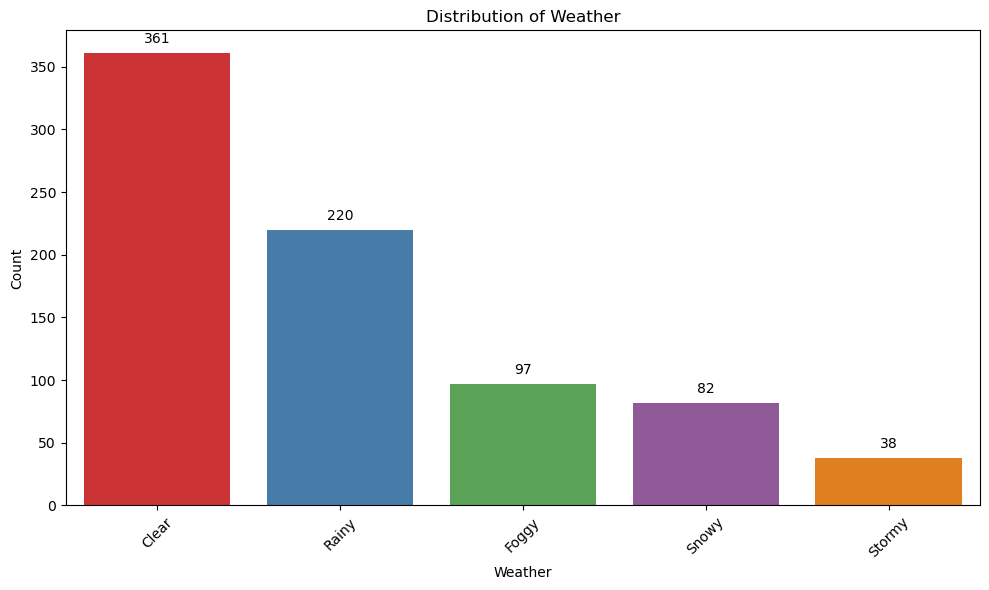

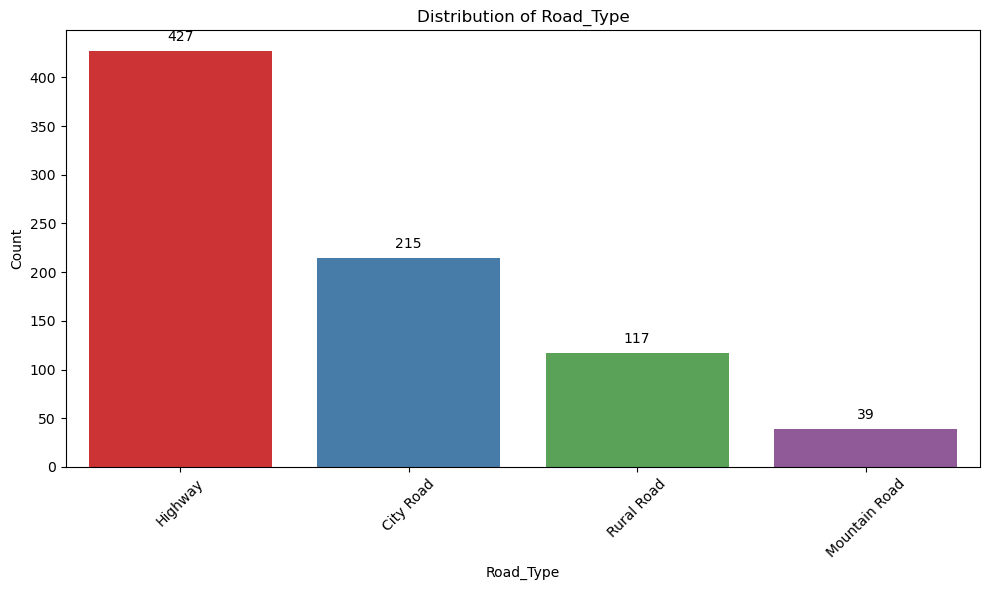

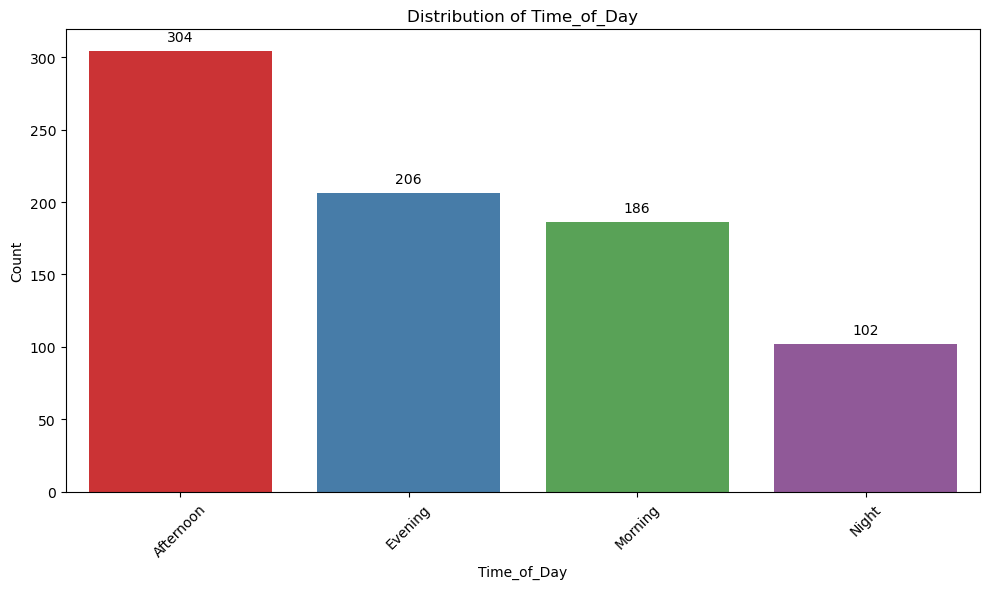

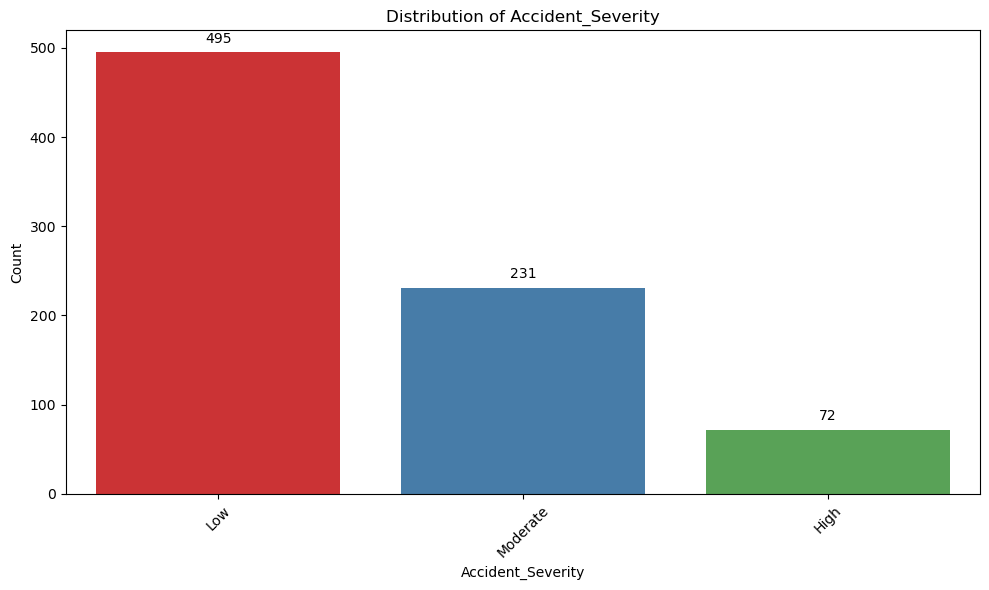

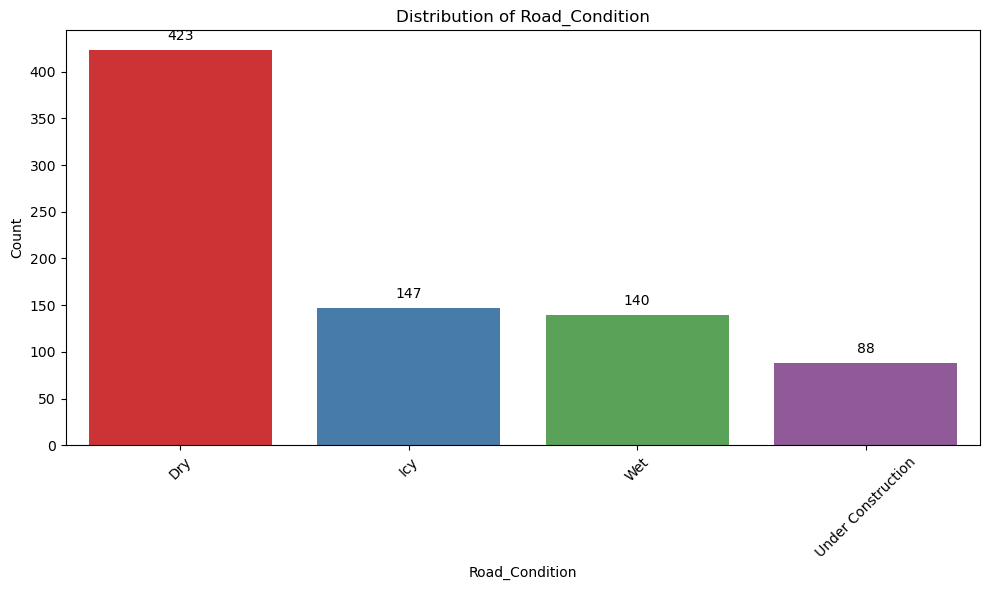

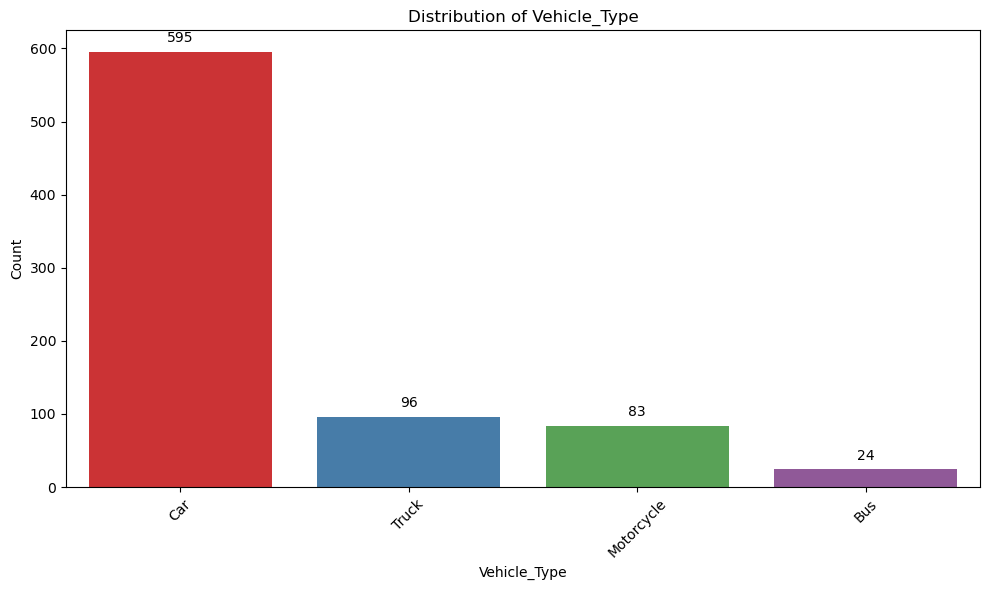

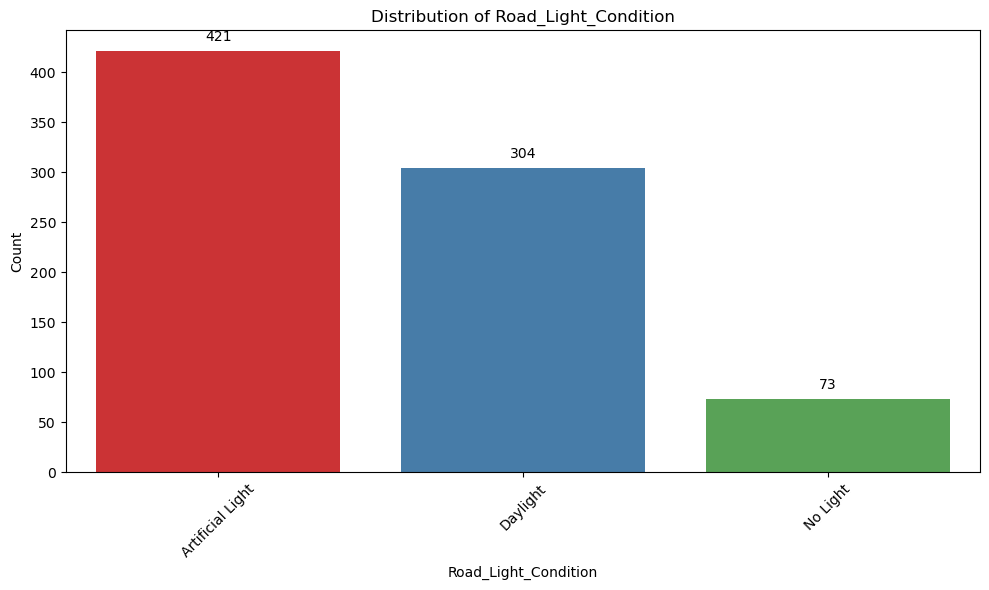

In [25]:
def plot_categorical_column(dataframe, column):
    value_counts = dataframe[column].value_counts()
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set1" )
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points' )
    plt.tight_layout()
    plt.show()

for col in cat_col:
    plot_categorical_column(df, col)

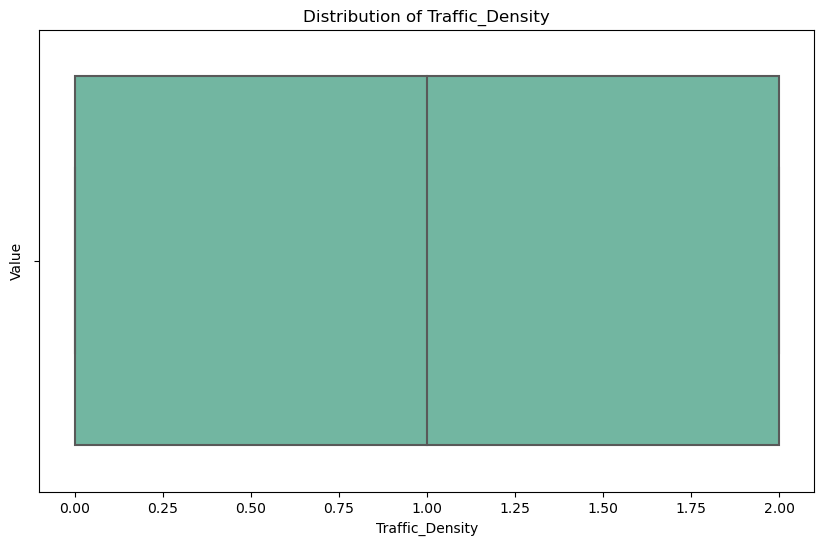

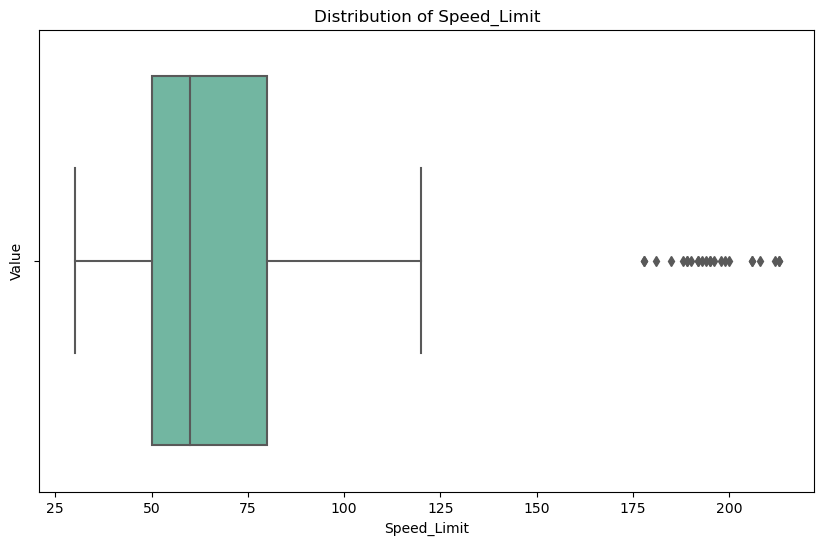

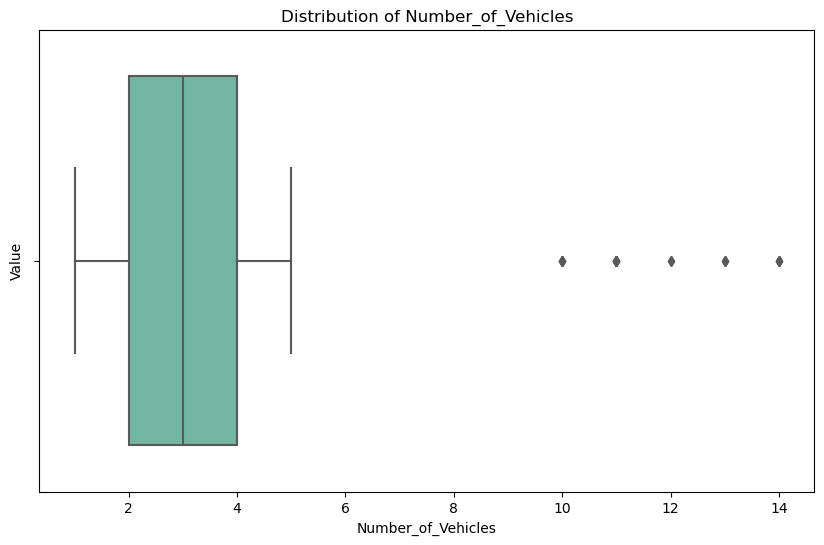

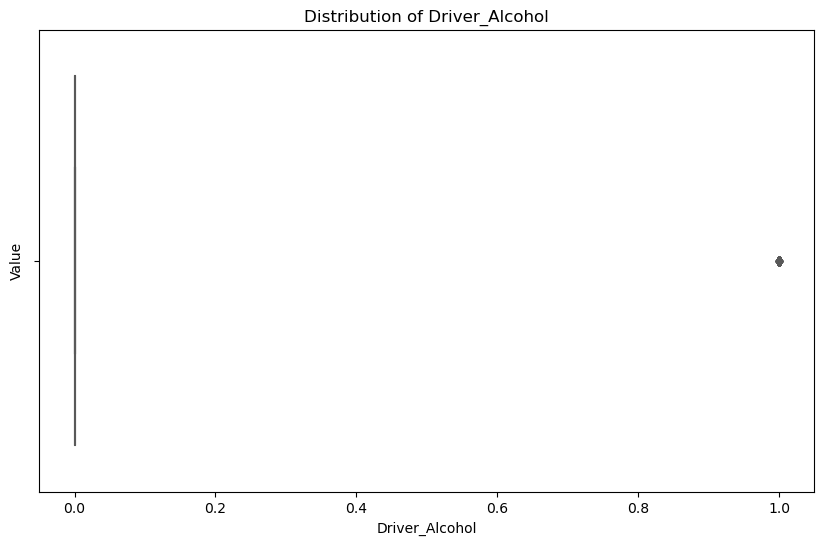

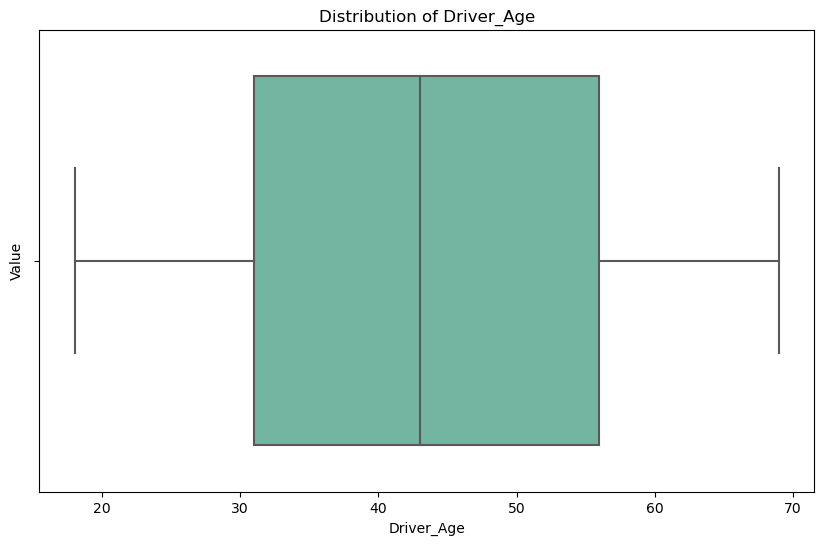

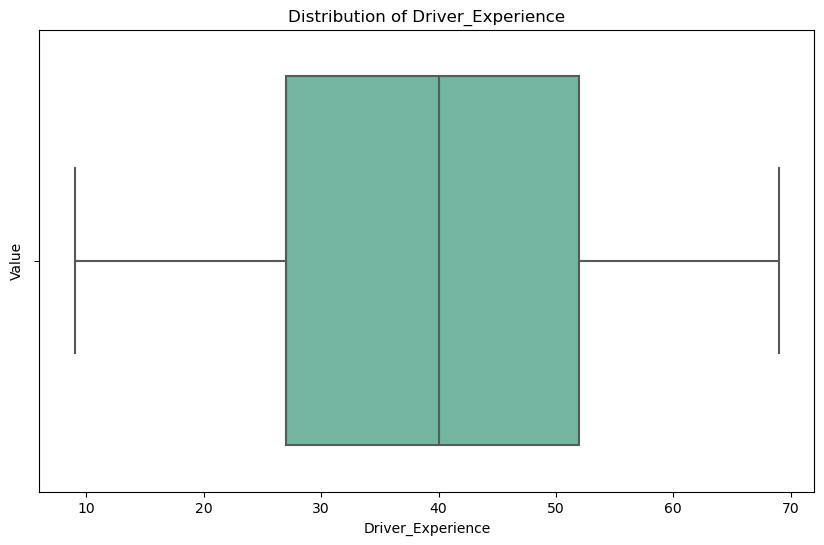

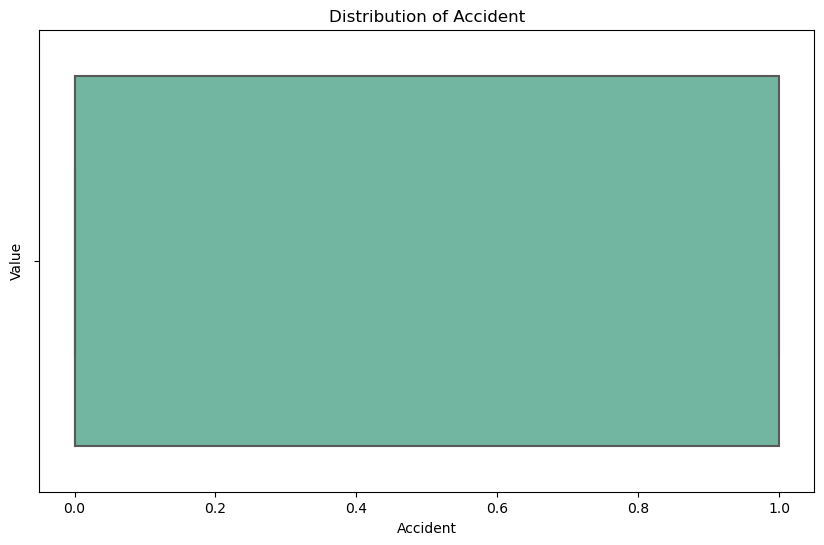

In [26]:
def plot_numerical_column(dataframe, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=dataframe[column] , palette="Set2")
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Distribution of {column}')
    plt.show()

for col in num_col:
    plot_numerical_column(df, col)


In [27]:
df.isnull().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

# Data Transformation

In [28]:
le = LabelEncoder()
df[cat_col] = df[cat_col].apply(le.fit_transform)

In [29]:
# log transformation: used for data preprocessing, especially when dealing with skewed numerical data.

df['Speed_Limit'] = np.log1p(df['Speed_Limit'])

In [30]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,2,0,2,1.0,4.615121,5.0,0.0,1,3,1,51.0,48.0,0,0.0
1,0,3,3,1.0,4.795791,3.0,0.0,2,3,3,49.0,43.0,0,0.0
2,2,1,1,1.0,4.110874,4.0,0.0,1,1,1,54.0,52.0,0,0.0
3,0,0,0,2.0,4.110874,3.0,0.0,1,2,0,34.0,31.0,1,0.0
4,2,1,2,1.0,5.278115,11.0,0.0,1,0,1,62.0,55.0,0,1.0


In [31]:
# Feature engineering is the process of preparing and transforming data to improve the performance of machine learning models.
# It involves Feature Selection, Feature Extraction, and Dimensionality Reduction.


# Feature engineering

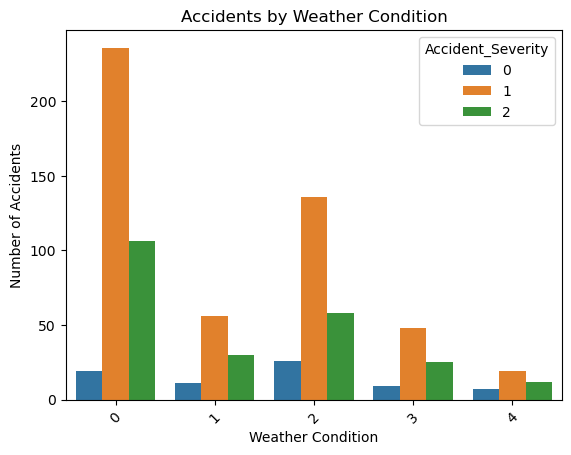

In [32]:
# df should contain columns like ['Weather', 'Accident_Severity', 'Accident_Count']
sns.countplot(data=df, x='Weather', hue='Accident_Severity')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

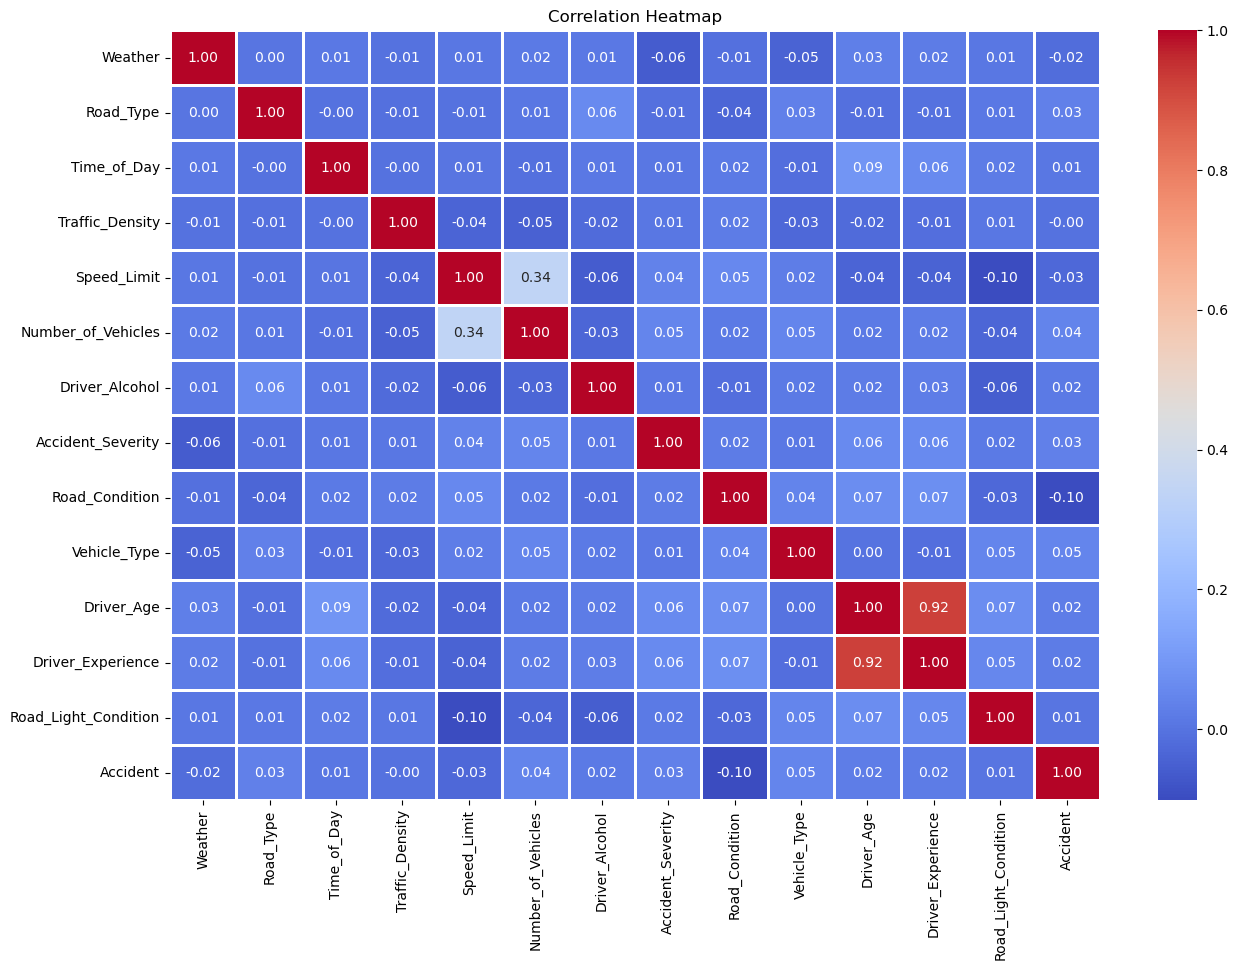

In [33]:
# Set figure size and heatmap grid size
plt.figure(figsize=(15, 10))  # Set figure size (width, height)

corr = df.corr()  # Compute correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8)
plt.title('Correlation Heatmap')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


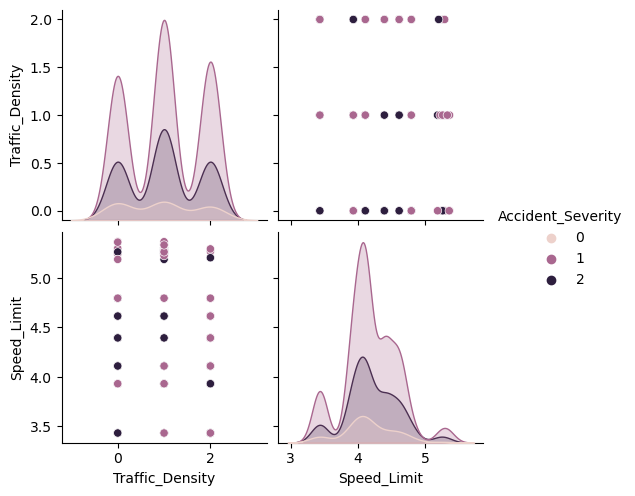

In [34]:
sns.pairplot(df[['Traffic_Density', 'Speed_Limit', 'Accident_Severity']], hue='Accident_Severity')
plt.show()

In [35]:
from sklearn.feature_selection import chi2

# Perform Chi-Square Test
chi_scores, p_values = chi2(df[['Road_Type']], df['Accident_Severity'])
print("Chi-Square Scores:", chi_scores)
print("P-Values:", p_values)


Chi-Square Scores: [1.75892807]
P-Values: [0.41500528]


In [36]:
from sklearn.model_selection import train_test_split

# Split the dataset
X = df.drop(columns=['Accident','Accident_Severity'])  # Features
y = df['Accident_Severity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check the class distribution
print(y_train.value_counts(normalize=True))  # Proportions of each class in the train set


Accident_Severity
1    0.620072
2    0.290323
0    0.089606
Name: proportion, dtype: float64


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09        22
           1       0.63      0.94      0.75       149
           2       0.41      0.10      0.16        69

    accuracy                           0.62       240
   macro avg       0.68      0.36      0.33       240
weighted avg       0.60      0.62      0.52       240



In [38]:
#Train the model with Logistics regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
# Train a Random Forest model
log_reg.fit(X_train,y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.55      0.22        22
           1       0.65      0.43      0.52       149
           2       0.35      0.28      0.31        69

    accuracy                           0.40       240
   macro avg       0.38      0.42      0.35       240
weighted avg       0.52      0.40      0.43       240



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[12  3  7]
 [57 64 28]
 [19 31 19]]


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
# Train a Random Forest model
dtc.fit(X_train,y_train)

# Predict on the test set
y_pred = dtc.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.04      0.05      0.04        22
           1       0.63      0.66      0.65       149
           2       0.38      0.30      0.34        69

    accuracy                           0.50       240
   macro avg       0.35      0.34      0.34       240
weighted avg       0.51      0.50      0.50       240



# XGBClassifier()

In [41]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [42]:
y_pred4 = xgb.predict(X_test)


In [43]:
print(accuracy_score(y_test, y_pred4))

0.5583333333333333


# SVC

In [44]:
from sklearn.svm import SVC
# Initialize and Train SVC Model
svc = SVC(kernel='linear', C=1.0)  # Use a linear kernel
svc.fit(X_train, y_train)

# Predictions
y_pred = svc.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6208333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.62      1.00      0.77       149
           2       0.00      0.00      0.00        69

    accuracy                           0.62       240
   macro avg       0.21      0.33      0.26       240
weighted avg       0.39      0.62      0.48       240



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
